In [ ]:
import numpy as np
from numpy import pi, cos, sin


def trajectory(theta, speed=20, height=0, dt=0.01, g=-9.81):  # 附加输入：时间步长dt、重力场强度g和角度θ（单位：度）
    vx = speed * cos(pi * theta / 180)  # 计算初始速度的x和z分量，将输入角度的单位从度转换为弧度
    vz = speed * sin(pi * theta / 180)
    t, x, z = 0, 0, height
    ts, xs, zs = [t], [x], [z]  # 初始化在模拟过程中保存的所有时间值和x、z位置的列表
    while z >= 0:  # 仅当炮弹在地面之上时运行模拟器
        t += dt
        vz += g * dt  # 更新时间、速度z和位置。没有力作用在x方向上，所以x速度不变
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs  # 返回t、x和z值的列表，给出炮弹的运动轨迹

In [56]:
import matplotlib.pyplot as plt


def plot_trajectory(*thetas, speed=20, height=0, dt=0.01, g=-9.81):  # 附加输入：时间步长dt、重力场强度g和角度θ（单位：度）
    max_xs = 0
    max_ys = 0
    for theta in thetas:
        print(f'----- 当前炮弹的发射角度为：{theta}° 发射速度为：{speed} m/s 发射高度为：{height} m -----')
        ts, xs, zs = trajectory(theta, speed, height, dt, g)
        # 获取指定角度的炮弹的落点坐标
        print(f'炮弹在角度 {theta}° 时的落点坐标为：{xs[-1]}, {zs[-1]}')
        # 获取炮弹的置空时间
        print(f'炮弹在角度 {theta}° 时的置空时间为：{ts[-1]}')
        # 获取炮弹的最大高度
        print(f'炮弹在角度 {theta}° 时的最大高度为：{max(zs)}')
        max_xs = max(max_xs, max(xs))
        max_ys = max(max_ys, max(zs))
        plt.plot(xs, zs)
        print()
    plt.title(f"Projectile motion with initial speed {speed} m/s")
    plt.xlabel("Horizontal distance (m)")
    plt.ylabel("Vertical distance (m)")
    plt.xlim(0, max_xs * 1.1)
    plt.ylim(0, max_ys * 1.1)
    plt.grid()
    plt.show()

----- 当前炮弹的发射角度为：45.0° 发射速度为：20 m/s 发射高度为：0 m -----
炮弹在角度 45.0° 时的落点坐标为：40.72935059634507, -0.09594540365491522
炮弹在角度 45.0° 时的置空时间为：2.8799999999999826
炮弹在角度 45.0° 时的最大高度为：10.123035298172544

----- 当前炮弹的发射角度为：60.0° 发射速度为：20 m/s 发射高度为：0 m -----
炮弹在角度 60.0° 时的落点坐标为：35.30000000000023, -0.15246749281868927
炮弹在角度 60.0° 时的置空时间为：3.5299999999999687
炮弹在角度 60.0° 时的最大高度为：15.20403821321222



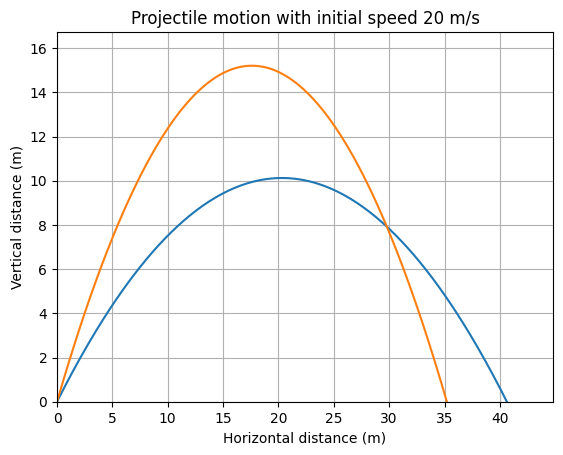

In [57]:
plot_trajectory(45.0, 60.0)

In [58]:
def plot_points(points, color='k', point_size=30, tlabel=None, xlabel=None):
    x_list = [p[0] for p in points]
    y_list = [p[1] for p in points]
    if tlabel:
        plt.xlabel(tlabel, fontsize=18)
    if xlabel:
        plt.ylabel(xlabel, fontsize=18)
    plt.scatter(x_list, y_list, c=color, s=point_size)

In [59]:
# 绘制角度在0到90度的炮弹落地距离点图
def plot_landing_points(speed=20, height=0, dt=0.01, g=-9.81, step=5):
    """
    绘制不同发射角度的炮弹落地距离点图
    :param thetas: 发射角度列表
    :param speed: 发射速度
    :param height: 发射高度
    :param dt: 时间步长
    :param g: 重力加速度
    :param step: 步长
    """
    points = []
    for theta in range(0, 91, step):
        ts, xs, zs = trajectory(theta, speed, height, dt, g)
        points.append((theta, xs[-1]))
    plot_points(points)

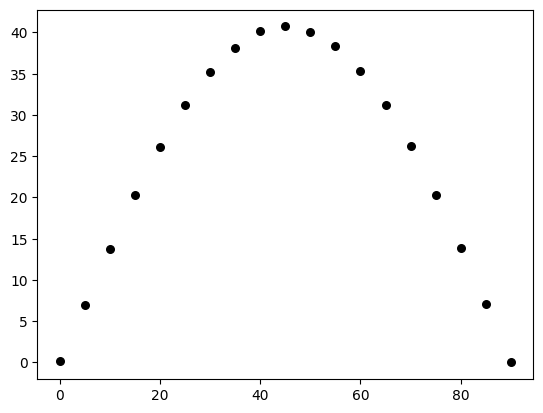

In [60]:
plot_landing_points()

In [61]:
# 高度与时间的图形
def plot_trajectory_time_height(theta, speed=20, height=0, dt=0.01, g=-9.81):
    ts, xs, zs = trajectory(theta, speed, height, dt, g)
    plt.plot(ts, zs)
    plt.title(f"Projectile motion with initial speed {speed} m/s")
    plt.xlabel("Time (s)")
    plt.ylabel("Vertical distance (m)")
    plt.grid()
    plt.show()

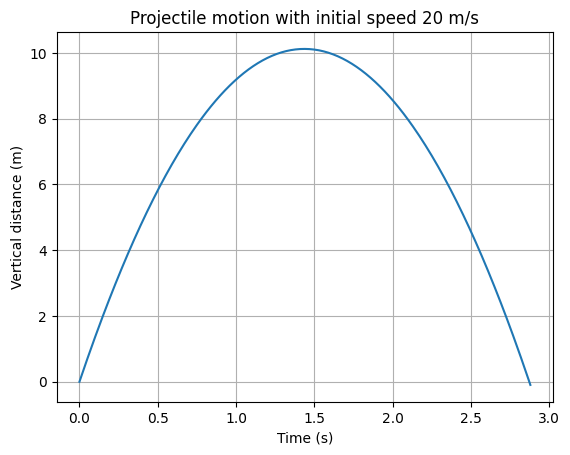

In [62]:
plot_trajectory_time_height(45.0)

In [63]:
# 绘制函数图形
def plot_function(f, x_range=(0, 2.9), **kwargs):
    x = np.linspace(x_range[0], x_range[1])
    y = f(x)
    plt.plot(x, y, **kwargs)

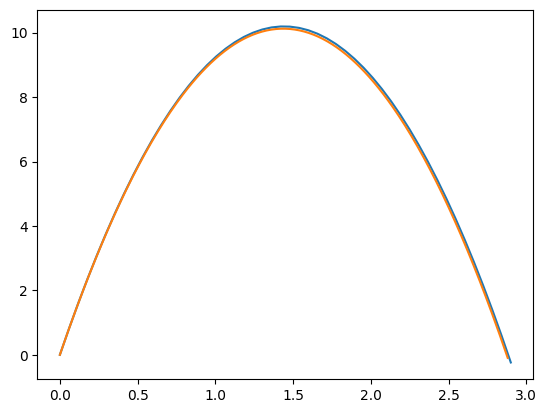

In [66]:
def time_of_height(time, theta=45):  # 将积分的结果z(t)直接转换成Python代码
    return 20 * sin(theta * pi / 180) * time + (-9.81 / 2) * time**2


plot_function(time_of_height)
ts, xs, zs = trajectory(45)
plt.plot(ts, zs)

Text(0, 0.5, 'Range (m)')

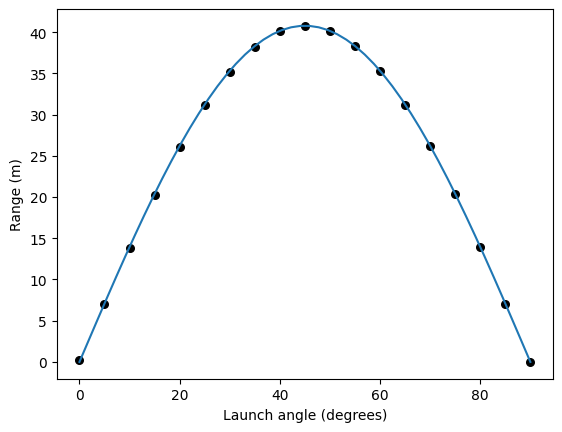

In [76]:
def r(theta):
    return (-2 * 20 * 20 / -9.81) * sin(theta * pi / 180) * cos(theta * pi / 180)


plot_landing_points()
plot_function(r, (0, 90))
# 绘制x和y轴的标签
plt.xlabel("Launch angle (degrees)")
plt.ylabel("Range (m)")

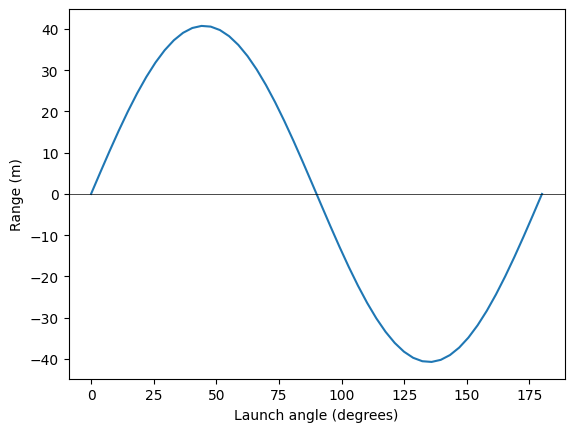

In [78]:
plot_function(r, (0, 180))
# 绘制x和y轴的标签
plt.xlabel("Launch angle (degrees)")
plt.ylabel("Range (m)")
# y轴0点的水平线
plt.axhline(0, color='black', lw=0.5)

Text(0, 0.5, 'Derivative of range (m)')

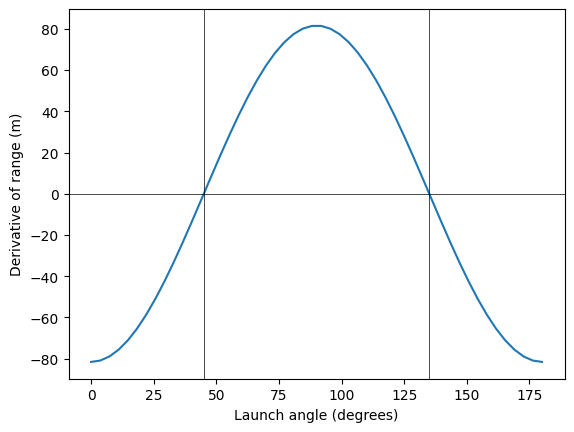

In [79]:
# 函数r的导数函数
def r_prime(theta):
    return (-((2*(20**2))/9.81)) * (cos(theta*pi/180)**2 - sin(theta*pi/180)**2)


plot_function(r_prime, (0, 180))
# 绘制y轴为0的网格线
plt.axhline(0, color='black', lw=0.5)
# 绘制x轴为45和135度的竖直线
plt.axvline(45, color='black', lw=0.5)
plt.axvline(135, color='black', lw=0.5)
# 绘制x和y轴的标签
plt.xlabel("Launch angle (degrees)")
plt.ylabel("Derivative of range (m)")